# Assignment 8
### Ryan Waterman
### 5/4/2025

### The libraries you will use are already loaded for you below

In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

## Question 1
Read in the two Netflix CSV files from /Data/Netflix as pandas dataframes.  These are the "credits.csv" and "titles.csv" files from this week's exercises


Print the number of unique genres. The problem is that each movie has one or more genres lists, in a form that looks like
['Genre_Name1','Genre_Name2','Genre_Name3']

So we need to 

a.) extract this column
b.) get rid of all the [] symbols
c.) force all the genre names into a single list
d.) Find the unique values in that list


This is not as simple as it sounds. You cannot simply find the length of `titles['genres'].unique()`. You must convert the output of that code to a list, iterate over that list and replace the following characters: `[]',`. Once you have them replaced you can split the individual strings to list items and flatten the list. I have already imported the `chain()` function for you to flatten the list. Look up the documentation to see its usage. There are 19 unique genres, but I want you to write the code to find them.

Set up a loop to iterate through the indices of the list,   make changes in the values in the list, checking each step as you go, and looking up the conversions you will need




In [333]:
# your code here

infile1="data/titles-1.csv"

infile2="data/credits-1.csv"


titles=pd.read_csv(infile1)

credits=pd.read_csv(infile2)

In [334]:
import re

In [335]:
titles.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [343]:
# https://www.google.com/search?q=python+itertools+chain+on+pandas+column&sca_esv=6a33239e80267d72&rlz=1C1UEAD_enUS1102US1102&sxsrf=AHTn8zp-v4JA6N7c1tpFuOvzV3rmPg-vew%3A1746373936918&ei=MI0XaN3hN_uv5NoPoajFgAI&ved=0ahUKEwjduZ7xlYqNAxX7F1kFHSFUESAQ4dUDCBA&uact=5&oq=python+itertools+chain+on+pandas+column&gs_lp=Egxnd3Mtd2l6LXNlcnAiJ3B5dGhvbiBpdGVydG9vbHMgY2hhaW4gb24gcGFuZGFzIGNvbHVtbjIFECEYoAEyBRAhGKABMgUQIRigATIFECEYoAFIsFBQpAxYlE5wBHgAkAEAmAGCAaABph-qAQUxMi4yNbgBA8gBAPgBAZgCKaAC6iDCAgsQABiABBiwAxiiBMICCxAAGLADGKIEGIkFwgIIEAAYsAMY7wXCAgQQIxgnwgIKECMYgAQYJxiKBcICChAAGIAEGEMYigXCAgsQABiABBiRAhiKBcICDRAAGIAEGLEDGBQYhwLCAggQABiABBixA8ICDhAAGIAEGJECGLEDGIoFwgIKEAAYgAQYFBiHAsICBRAAGIAEwgIGEAAYFhgewgILEAAYgAQYhgMYigXCAggQABgWGAoYHsICCBAAGKIEGIkFwgIFEAAY7wXCAggQABiABBiiBMICBRAhGKsCwgIFECEYnwXCAgcQIRigARgKmAMAiAYBkAYFkgcFMTIuMjmgB5XdAbIHBDguMjm4B9Yg&sclient=gws-wiz-serp

# The google search, above, leads me to believe this can be done without any string replacement. Let's see.
chained_genres = list(chain(*[eval(genre) for genre in titles['genres']]))
chained_genres[0:15]

['documentation',
 'crime',
 'drama',
 'comedy',
 'fantasy',
 'comedy',
 'horror',
 'comedy',
 'european',
 'thriller',
 'crime',
 'action',
 'drama',
 'music',
 'romance']

Okay, I am happy with this. It took some type coercing, but the values of the column were already in list format, so they could be unpacked after being evaluated. This is an elegant solution, thank you python. Now, let's get the unique values.

In [337]:
unique_genres = set(chained_genres)
print(unique_genres)
print(len(unique_genres))

{'war', 'action', 'animation', 'romance', 'drama', 'fantasy', 'crime', 'thriller', 'comedy', 'history', 'family', 'music', 'sport', 'scifi', 'horror', 'documentation', 'reality', 'western', 'european'}
19


## Question 2
Print the release year and the imdb score of the highest average score of all movies by year. This is trickier than it sounds. 

To do this you will need to aggregate the max by year. If you use the simple method you will get a pandas series. The series will need to be converted to a dataframe and the index will need to be set as a column (release year). Once you have done that you can find the numerical index with the highest average imdb score. 

In [344]:
# The way this question is phrased makes me believe there are multiple entries per film for each year. Let's check.
print(len(titles["title"]),len(titles["title"].unique()))

5806 5752


In [351]:
# So, there are multiple titles. I am curious about why they have duplicate entries. I want to find the duplicates.
existing_titles = {}
duplicate_titles = []

for i, title in enumerate(titles["title"]):
    if title not in existing_titles:
        existing_titles[f'{title}'] = i
    else:
        duplicate_titles.append(f'{title}')
    
duplicate_titles[0:10]

['A Nightmare on Elm Street',
 'Dostana',
 'A Lion in the House',
 'Christine',
 'Shooter',
 'Danger Mouse',
 'The Heirs',
 'Taxi Driver',
 'A Second Chance',
 'Love O2O']

In [353]:
# Search for the duplicates in the titles dataframe
titles[titles['title'].isin(duplicate_titles)].sort_values(by='title').head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
657,ts19384,A Lion in the House,SHOW,Five families struggle with the ups and downs ...,2006,TV-14,225,['documentation'],['US'],1.0,NaN,NaN,NaN,1.271,7.5
519,tm25842,A Lion in the House,MOVIE,Five families struggle with the ups and downs ...,2006,NaN,225,['documentation'],['US'],NaN,tt0492472,8.7,312.0,2.821,6.5
54,tm2386,A Nightmare on Elm Street,MOVIE,Teenagers in a small town are dropping like fl...,1984,R,91,['horror'],['US'],NaN,tt0087800,7.4,230543.0,53.853,7.3
355,tm102337,A Nightmare on Elm Street,MOVIE,The film that brings back horror icon Freddy K...,2010,R,95,"['horror', 'thriller', 'crime', 'drama']",['US'],NaN,tt1179056,5.2,99192.0,46.304,5.5
1731,tm232710,A Second Chance,MOVIE,"Popoy and Basha have had a wonderful wedding, ...",2015,NaN,130,"['romance', 'drama', 'family', 'sport', 'docum...",['PH'],NaN,tt5226380,8.6,47.0,3.425,7.1


Interesting... So there are a couple reasons why there are duplicate values. One of which is when movies share a title with a show. This is an easy fix, we can just filter my movie.

In [369]:
# filter out the movies and select title, year, and IMDB score
movies = titles[titles['type']=='MOVIE']
movies = movies[['release_year','imdb_score']]

In [ ]:
#group the movies by title and year, then flatten headings
max_imdb_scores = movies.groupby(['release_year']).max()
max_imdb_scores = max_imdb_scores.reset_index().sort_values(by='release_year')

In [460]:
# There is probably a better way to do this, but I haven't found it.

# build the dictionary that we will use to construct the new df
# defaultdict is used so the append operation functions correctly
from collections import defaultdict
highest_scoring_titles = defaultdict(list)
for title in titles.columns.to_list():
    highest_scoring_titles[title]

# Loop through the years and scores that were identified as the maximum
for year, score in max_imdb_scores.values:
    #filter the titles df by these values
    filtered = titles[(titles['release_year']==year) & (titles['imdb_score']==score)]
    #loop through each column of this filtered df and assign the value to the dictionary
    for col in filtered:
        value = filtered.iloc[0][f'{col}']
        highest_scoring_titles[col].append(value)

#convert the dictionary to a df and look at the first 10 values
highest_scoring_titles = pd.DataFrame(highest_scoring_titles)
highest_scoring_titles.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm102287,Raya and Sakina,MOVIE,Dramatic rendition of a real life crime wave t...,1953,NaN,105,"['drama', 'thriller', 'crime', 'history']",['EG'],NaN,tt0316472,6.8,231.0,1.826,5.8
1,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,"['romance', 'comedy', 'music']",['US'],NaN,tt0047673,7.5,42373.0,9.710,7.2
2,tm204541,Dark Waters,MOVIE,"Ragab, a poor sailor, returns home to Alexandr...",1956,NaN,120,"['drama', 'action', 'romance', 'thriller']",['EG'],NaN,tt0049761,6.7,590.0,1.044,5.9
3,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,"['drama', 'crime', 'comedy']",['EG'],NaN,tt0051390,7.5,4385.0,3.556,7.4
4,tm358653,Ujala,MOVIE,An honest man dreams of a better life for his ...,1959,NaN,142,"['romance', 'crime', 'drama']",['IN'],NaN,tt0157132,6.7,78.0,0.998,6.0
5,tm356209,Singapore,MOVIE,"When his employee disappears in Singapore, Shy...",1960,NaN,158,"['drama', 'thriller', 'crime']",['IN'],NaN,tt0268639,6.4,82.0,1.611,6.3
6,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,NaN,158,"['war', 'action', 'drama']","['US', 'GB']",NaN,tt0054953,7.5,50150.0,15.405,7.4
7,tm10204,Professor,MOVIE,Sita devi is a very strict aunt for a number o...,1962,NaN,163,"['romance', 'comedy', 'drama']",['IN'],NaN,tt0056379,6.8,285.0,1.900,5.8
8,tm27298,Saladin the Victorious,MOVIE,"Saladin, the first sultan of Egypt and Syria, ...",1963,NaN,186,"['drama', 'war', 'action', 'history', 'romance']",['EG'],NaN,tt0057357,7.6,2470.0,4.816,7.1
9,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,"['drama', 'music', 'romance', 'family']",['US'],NaN,tt0058385,7.8,94121.0,15.949,7.6


## Question 3
There were 208 actors in the movie with the most credited actors. What is the title of that movie? Nulls and NaN values do not count. 

In [ ]:
# Group by any of the credits variables, get the count, then reset the index so max can be calculated
counts = credits.dropna().groupby("id").count().reset_index()
# Calculate mac
max_entries = counts.max()
# Get id
max_entries_id = max_entries["id"]
max_entries_id


'ts987'

In [479]:
# Now, search for that id in titles and return the title name
titles[titles["id"]==max_entries_id]["title"]

67    Danger Mouse
Name: title, dtype: object

## Question 4
Which movie has the highest IMDB score for the actor Robert De Niro? What year was it made? Create a kdeplot (kernel density estimation to show the distribution of his IMDB movie scores. 


Think about how you would do this,  probably by extracting a list of movie id's for films with De Niro from the credits file, then adding the corresponding imdb scores and years to this data



In [ ]:
# find all movies with Robert De Niro
de_niro_movies = credits.dropna()[credits["name"]=="Robert De Niro"]["id"].to_list()
de_niro_movies


C:\Users\water\AppData\Local\Temp\ipykernel_27140\3272002040.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  de_niro_movies = credits.dropna()[credits["name"]=="Robert De Niro"]["id"].to_list()


['tm84618',
 'tm180542',
 'tm145608',
 'tm84906',
 'tm59428',
 'tm165995',
 'tm181533',
 'tm311902',
 'tm244149',
 'tm844497']

In [483]:
# Filter titles by these movies
de_niro_titles = titles[titles["id"].isin(de_niro_movies)]
filtered_de_niro_titles = de_niro_titles[["title","release_year","imdb_score"]]
filtered_de_niro_titles.groupby(["title","release_year"]).max()
filtered_de_niro_titles

,title,release_year,imdb_score
1,Taxi Driver,1976,8.3
49,Once Upon a Time in America,1984,8.3
56,Awakenings,1990,7.8
299,Stardust,2007,7.6
727,Silver Linings Playbook,2012,7.7
765,New Year's Eve,2011,5.6
998,The Big Wedding,2013,5.6
2947,Jim Norton: Mouthful of Shame,2017,7.0
3216,The Irishman,2019,7.8
4272,The Irishman: In Conversation,2019,NaN


The highest rated De Niro movies are Taxi Driver and Once Upon a Time in America, release in 1976 and 1984, respectively.

<Axes: xlabel='imdb_score', ylabel='Density'>

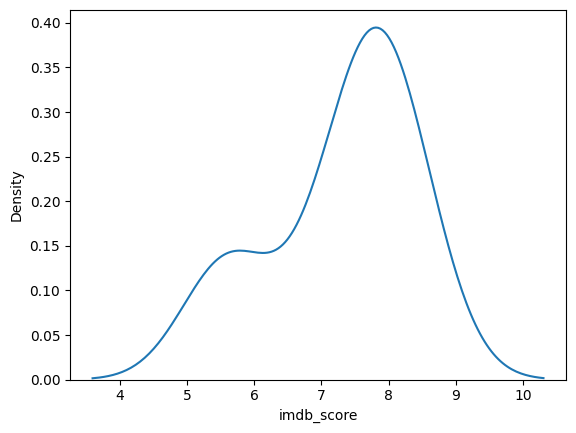

In [484]:
sns.kdeplot(data=filtered_de_niro_titles,x=filtered_de_niro_titles["imdb_score"])

## Question 5
Create two new boolean columns in the titles dataframe that are true when the description contains war or gangster. Call these columns `war_movies` and `gangster_movies`. How many movies are there in both categories? Which category has a higher average IMDB score? Show the IMDB score kernel density estimations of both categories.


In [497]:
descriptions = titles["description"].astype(str).to_list()

In [514]:
# Find the descriptions that contain the 
# Source: https://stackoverflow.com/questions/3437059/does-python-have-a-string-contains-substring-method
titles["war_movies"] = [True if description.lower().__contains__("war") else False for description in descriptions]
titles["gangster_movies"] = [True if description.lower().__contains__("gangster") else False for description in descriptions]
titles.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,war_movies,gangster_movies
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,True,False
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,True,False
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,False,False
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,False,False
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,False,False


In [516]:
# Find the count of movies with both war and gangster
len(titles[(titles["war_movies"]==True) & (titles["gangster_movies"]==True)])


3

In [520]:
mean_war_score = titles[titles["war_movies"]==True]["imdb_score"].mean()
mean_gangster_score = titles[titles["gangster_movies"]==True]["imdb_score"].mean()

print(mean_war_score,mean_gangster_score)


6.772439024390243 6.3914285714285715


<Axes: xlabel='imdb_score', ylabel='Density'>

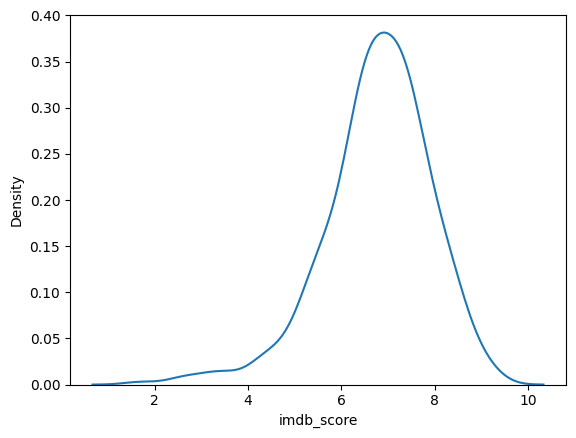

In [ ]:
war_scores = titles[["imdb_score","war_movies"]][titles["war_movies"]==True]
sns.kdeplot(data=war_scores, x=war_scores["imdb_score"])

<Axes: xlabel='imdb_score', ylabel='Density'>

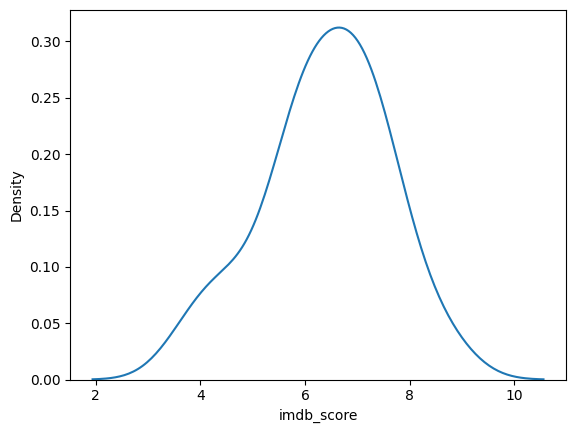

In [523]:
gangster_scores = titles[["imdb_score","gangster_movies"]][titles["gangster_movies"]==True]
sns.kdeplot(data=gangster_scores, x=gangster_scores["imdb_score"])